In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
file_path = 'dataset/anaemia.csv' 
df = pd.read_csv(file_path)

print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [2]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [3]:
print("\nDescripción estadística de las variables numéricas:")
display(df.describe())


Descripción estadística de las variables numéricas:


,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [4]:
print("\nDescripción estadística de las variables categóricas:")
display(df.describe(include=['object']))


Descripción estadística de las variables categóricas:


,Sex,Anaemic
count,104,104
unique,4,2
top,M,No
freq,29,78


In [5]:
print("\nRevisión de valores nulos:")
display(df.isnull().sum())


Revisión de valores nulos:


Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

Anaemic
No     78
Yes    26
Name: count, dtype: int64

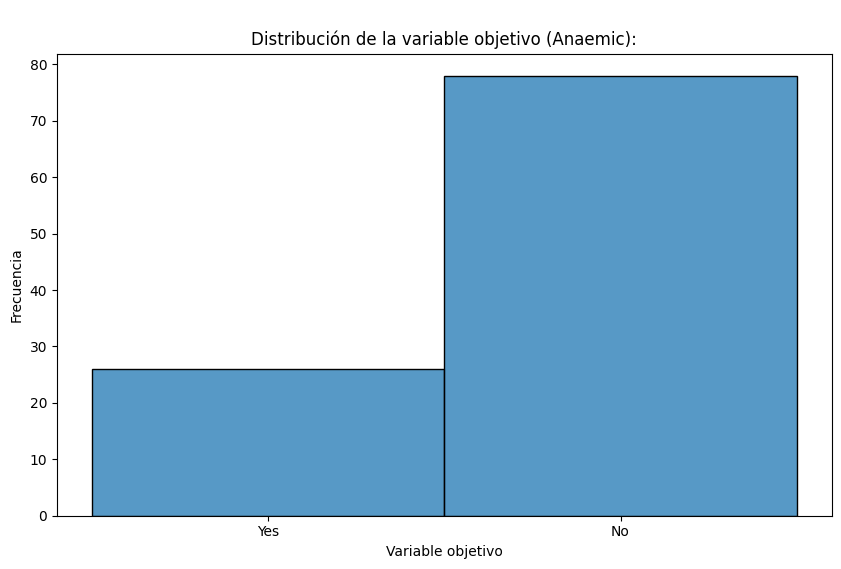

In [22]:
# Distribución de los niveles de 
display(df['Anaemic'].value_counts())
plt.figure(figsize=(10, 6))
sns.histplot(df['Anaemic'])
plt.title('\nDistribución de la variable objetivo (Anaemic):')
plt.xlabel('Variable objetivo')
plt.ylabel('Frecuencia')
plt.show()

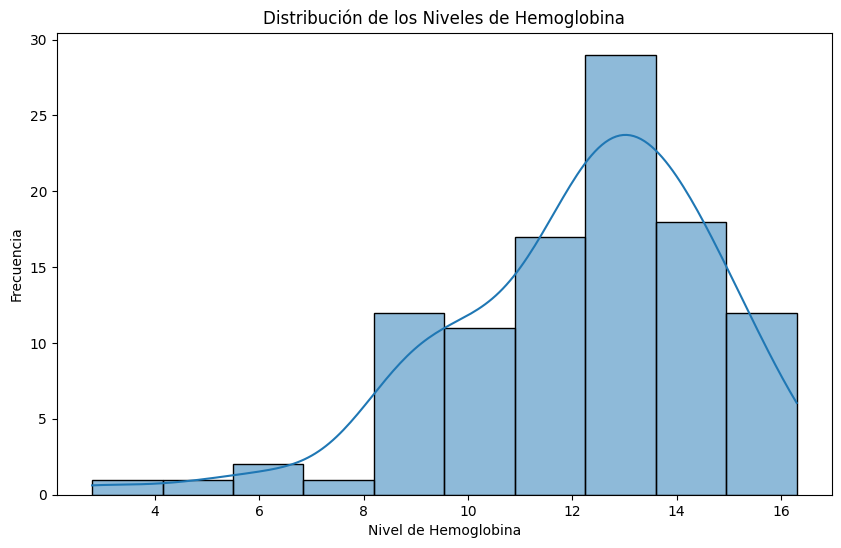

In [13]:
# Distribución de los niveles de hemoglobina
plt.figure(figsize=(10, 6))
sns.histplot(df['Hb'], kde=True)
plt.title('Distribución de los Niveles de Hemoglobina')
plt.xlabel('Nivel de Hemoglobina')
plt.ylabel('Frecuencia')
plt.show()

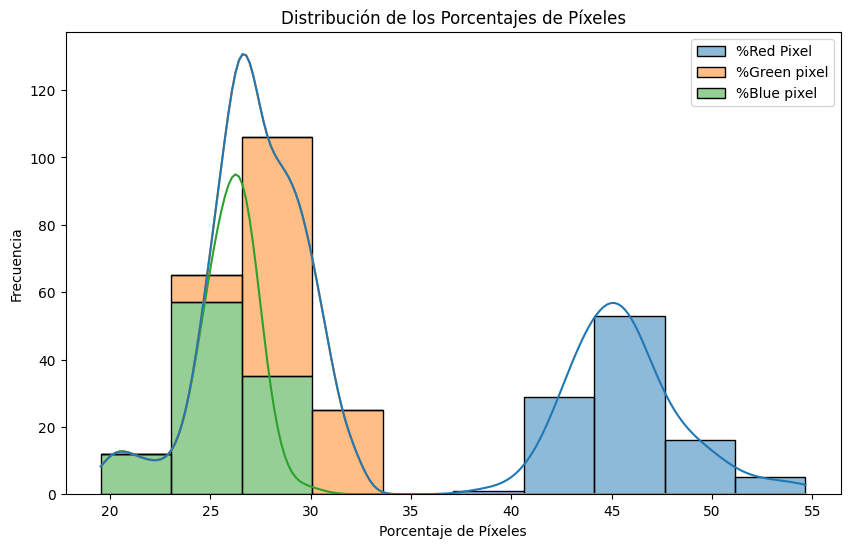

In [14]:
# Distribución de los porcentajes de píxeles
plt.figure(figsize=(10, 6))
sns.histplot(df[['%Red Pixel', '%Green pixel', '%Blue pixel']], kde=True, multiple="stack")
plt.title('Distribución de los Porcentajes de Píxeles')
plt.xlabel('Porcentaje de Píxeles')
plt.ylabel('Frecuencia')
plt.show()

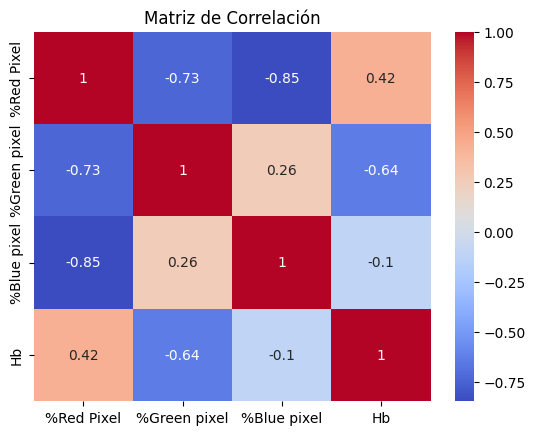

In [16]:
numeric_df = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

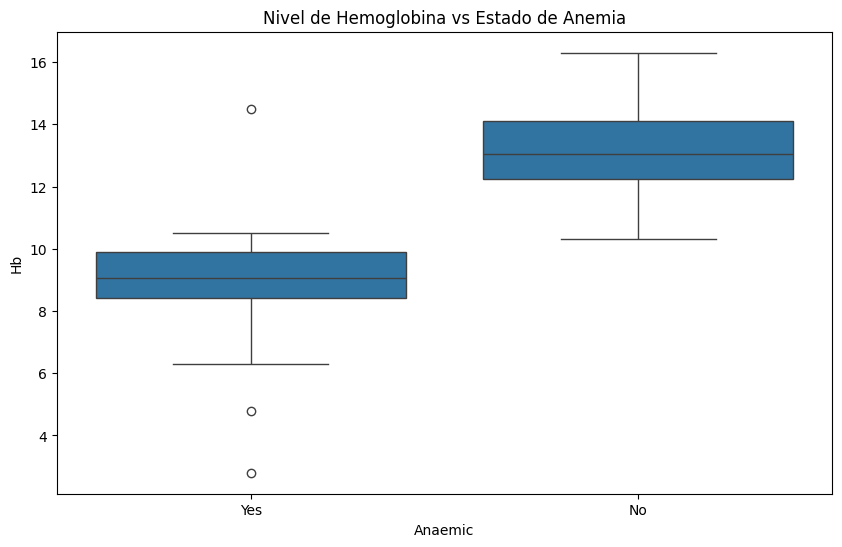

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anaemic', y='Hb', data=df)
plt.title('Nivel de Hemoglobina vs Estado de Anemia')
plt.show()

In [20]:
# Comparación de las medias de los porcentajes de píxeles entre los grupos anémicos y no anémicos
anaemia_group = df.groupby('Anaemic').mean(numeric_only=True)
print(anaemia_group[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']])

         %Red Pixel  %Green pixel  %Blue pixel         Hb
Anaemic                                                  
No        46.225991     28.369649    25.404364  13.257692
Yes       43.938727     30.393081    25.668208   8.830769
